Observing the double descent phenomenon in the Latent Case

$$
\Sigma = WW^T + I_p \\
x_i = \Sigma^{1/2}z_i \\
\left(x_i, \epsilon_i\right) \sim P_x \times P_\epsilon, \quad i=1, \ldots, n, \\
y_i=x_i^T \beta+\epsilon_i, \quad i=1, \ldots, n,
$$

where, $P_x$ is a distribution on $\mathbb{R}^p$ such that $\mathbb{E}\left(x_i\right)=0$, $\operatorname{Cov}\left(x_i\right)=\Sigma$, and $P_\epsilon$ is a distribution on $\mathbb{R}$ such that $\mathbb{E}\left(\epsilon_i\right)=0, \operatorname{Var}\left(\epsilon_i\right)=\sigma^2$

In [1]:
# Importing some useful libraries

import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
import sklearn as sci
import sklearn_pandas as scip
import random
from sklearn import linear_model

from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit
from sklearn import linear_model

import pandas as pd
from numpy import arange
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [2]:

# Turning off warnings
import warnings
warnings.filterwarnings('ignore')

# Generating Data
N = 200
d = 50
p_values = np.linspace(120, 600, 100)
p_values = p_values.astype('int')

# set regularisation strength value
# First we consider this ridgeless setting in which the regularization strength is approximately zero
lmbda = 10**(- np.inf)

# Initializing the MSE and the overparameterization ratio
MSE = []
RATIO = []
# MSE_train = []

for p in p_values:
  W = np.random.random((p, d))
  # We define Beta in such a way that it lies in the span of the columns of W.
  Beta = W[:,:1]
  Beta = Beta.flatten()
  #Beta = Beta.reshape()
  Sigma = W.dot(W.transpose()) + np.identity(p, dtype="float")
  # generating a linearly the matrix Z with linearly independent columns.
  z = np.random.rand(N,p)
  r = np.linalg.matrix_rank(z)
  # while r < p :
  #   z = np.random.rand(N,p)
  #   r = np.linalg.matrix_rank(z)
  # Generating the matrix x from z as defined in the model
  x = np.sqrt(Sigma).dot(z.transpose())
  x = x.transpose()
  #generating Gaussian noise with 0 mean and variance 1
  noise = np.random.normal(0,1,N)
  y = x.dot(Beta) + noise

  #Initialize coeffficients for ridge regression
  coefs_ridge = []

  #Splitting the dataset in test and train data
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

  # Defining our model for learning
  ### apply RIDGE regression

  ridge=linear_model.Ridge()
  model = ridge.set_params(alpha=lmbda) # set regularisation parameter
  model.fit(x_train, y_train) # fit model
  coefs_ridge.append(ridge.coef_) # store weights

  # Calculating the MSE and the overparameterization ratio
  ratio = p/N
  mse = np.mean(((y_test - model.predict(x_test))**2))
  RATIO.append(ratio)
  MSE.append(mse)

In [3]:
# Ridge setting
# Second, we consider the ridge setting in which the regularization strength is arbitrary big
lmbda = 158

# Initializing the MSE for ridge lmbda = 1
MSE_ridge = []

for p in p_values:
  W = np.random.random((p, d))
  # We define Beta in such a way that it lies in the span of the columns of W.
  Beta = W[:,:1]
  Beta = Beta.flatten()
  #Beta = Beta.reshape()
  Sigma = W.dot(W.transpose()) + np.identity(p, dtype="float")
  # generating a linearly the matrix Z with linearly independent columns.
  z = np.random.rand(N,p)
  r = np.linalg.matrix_rank(z)
  # while r < p :
  #   z = np.random.rand(N,p)
  #   r = np.linalg.matrix_rank(z)
  # Generating the matrix x from z as defined in the model
  x = np.sqrt(Sigma).dot(z.transpose())
  x = x.transpose()
  #generating Gaussian noise with 0 mean and variance 1
  noise = np.random.normal(0,1,N)
  y = x.dot(Beta) + noise

  #Initialize coeffficients for ridge regression
  coefs_ridge = []

  #Splitting the dataset in test and train data
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

  # Defining our model for learning
  ### apply RIDGE regression

  ridge=linear_model.Ridge()
  model = ridge.set_params(alpha=lmbda) # set regularisation parameter
  model.fit(x_train, y_train) # fit model
  coefs_ridge.append(ridge.coef_) # store weights

  # Calculating the MSE_ridge
  mse = np.mean(((y_test - model.predict(x_test))**2))
  MSE_ridge.append(mse)

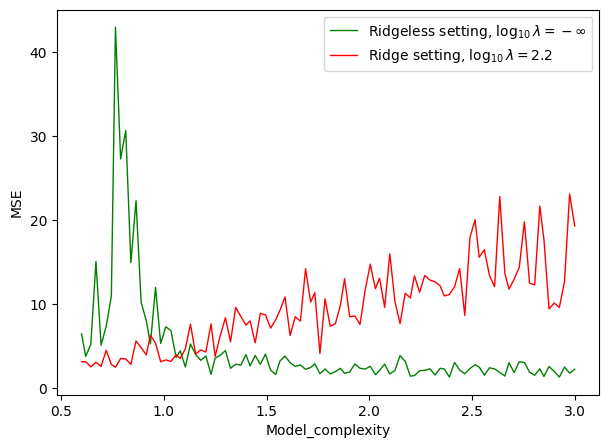

In [4]:
#PLOT

from numbers import Rational
plt.plot(RATIO, MSE,'g',label= 'Ridgeless setting, $\log_{10} \lambda = - \infty $', linewidth=1)
plt.plot(RATIO, MSE_ridge,'r',label='Ridge setting, $\log_{10} \lambda = 2.2 $', linewidth=1)

fig = plt.gcf()
fig.set_size_inches(7.0, 5.0)

# # #plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
# # #           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left',fontsize=8)
#plt.xlim([min(p_values), max(p_values)])
plt.xlabel(r'Model_complexity',fontsize=10)
plt.ylabel('MSE',fontsize=10)
# plt.tick_params(labelsize=10)
plt.legend()
plt.show()